# Non-linear Transformations of the Predictors
The `lm()` function can also accommodate non-linear transformations of the predictors. For instance, given a predictor $X$, we can create a predictor $X^2$ using `I(X^2)`. The function `I()` is needed since the `^` has a special meaning in a formula object; wrapping as we do allows the standard usage in `R`, which is to raise `X` to the power `2`. We now perform a regression of `medv` onto `lstat` and $\text{lstat}^2$.

In [1]:
library(ISLR2)
attach(Boston)
lm.fit2 <- lm(medv ~ lstat + I(lstat^2))
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The near-zero _p_-value associated with the quadratic term suggests that it leads to an improved model. We use the `anova()` function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [2]:
lm.fit <- lm(medv ~ lstat)
anova(lm.fit, lm.fit2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,19472.38,NA,NA,NA,NA
2,503,15347.24,1,4125.138,135.1998,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictork, `lstat`, while Model2 corresponds to the larger quadratic model that has two predictors, `lstat` and `lstat`$^2$. The `anova()` function performs a hypothesis test comparing the two models. The null hypothesis is that the full model is superior. Here the _F_-statistic is $135$ and the associated _p_-value is virtually zero. This provides very clear evidence that the model containg the predictors `lstat` and `lstat`$^2$ is far superior to the model that only contains the predictor `lstat`. This is not surprising, since earlier we saw evidence for non-linearity in the relationship between `medv` and `lstat`. If we type

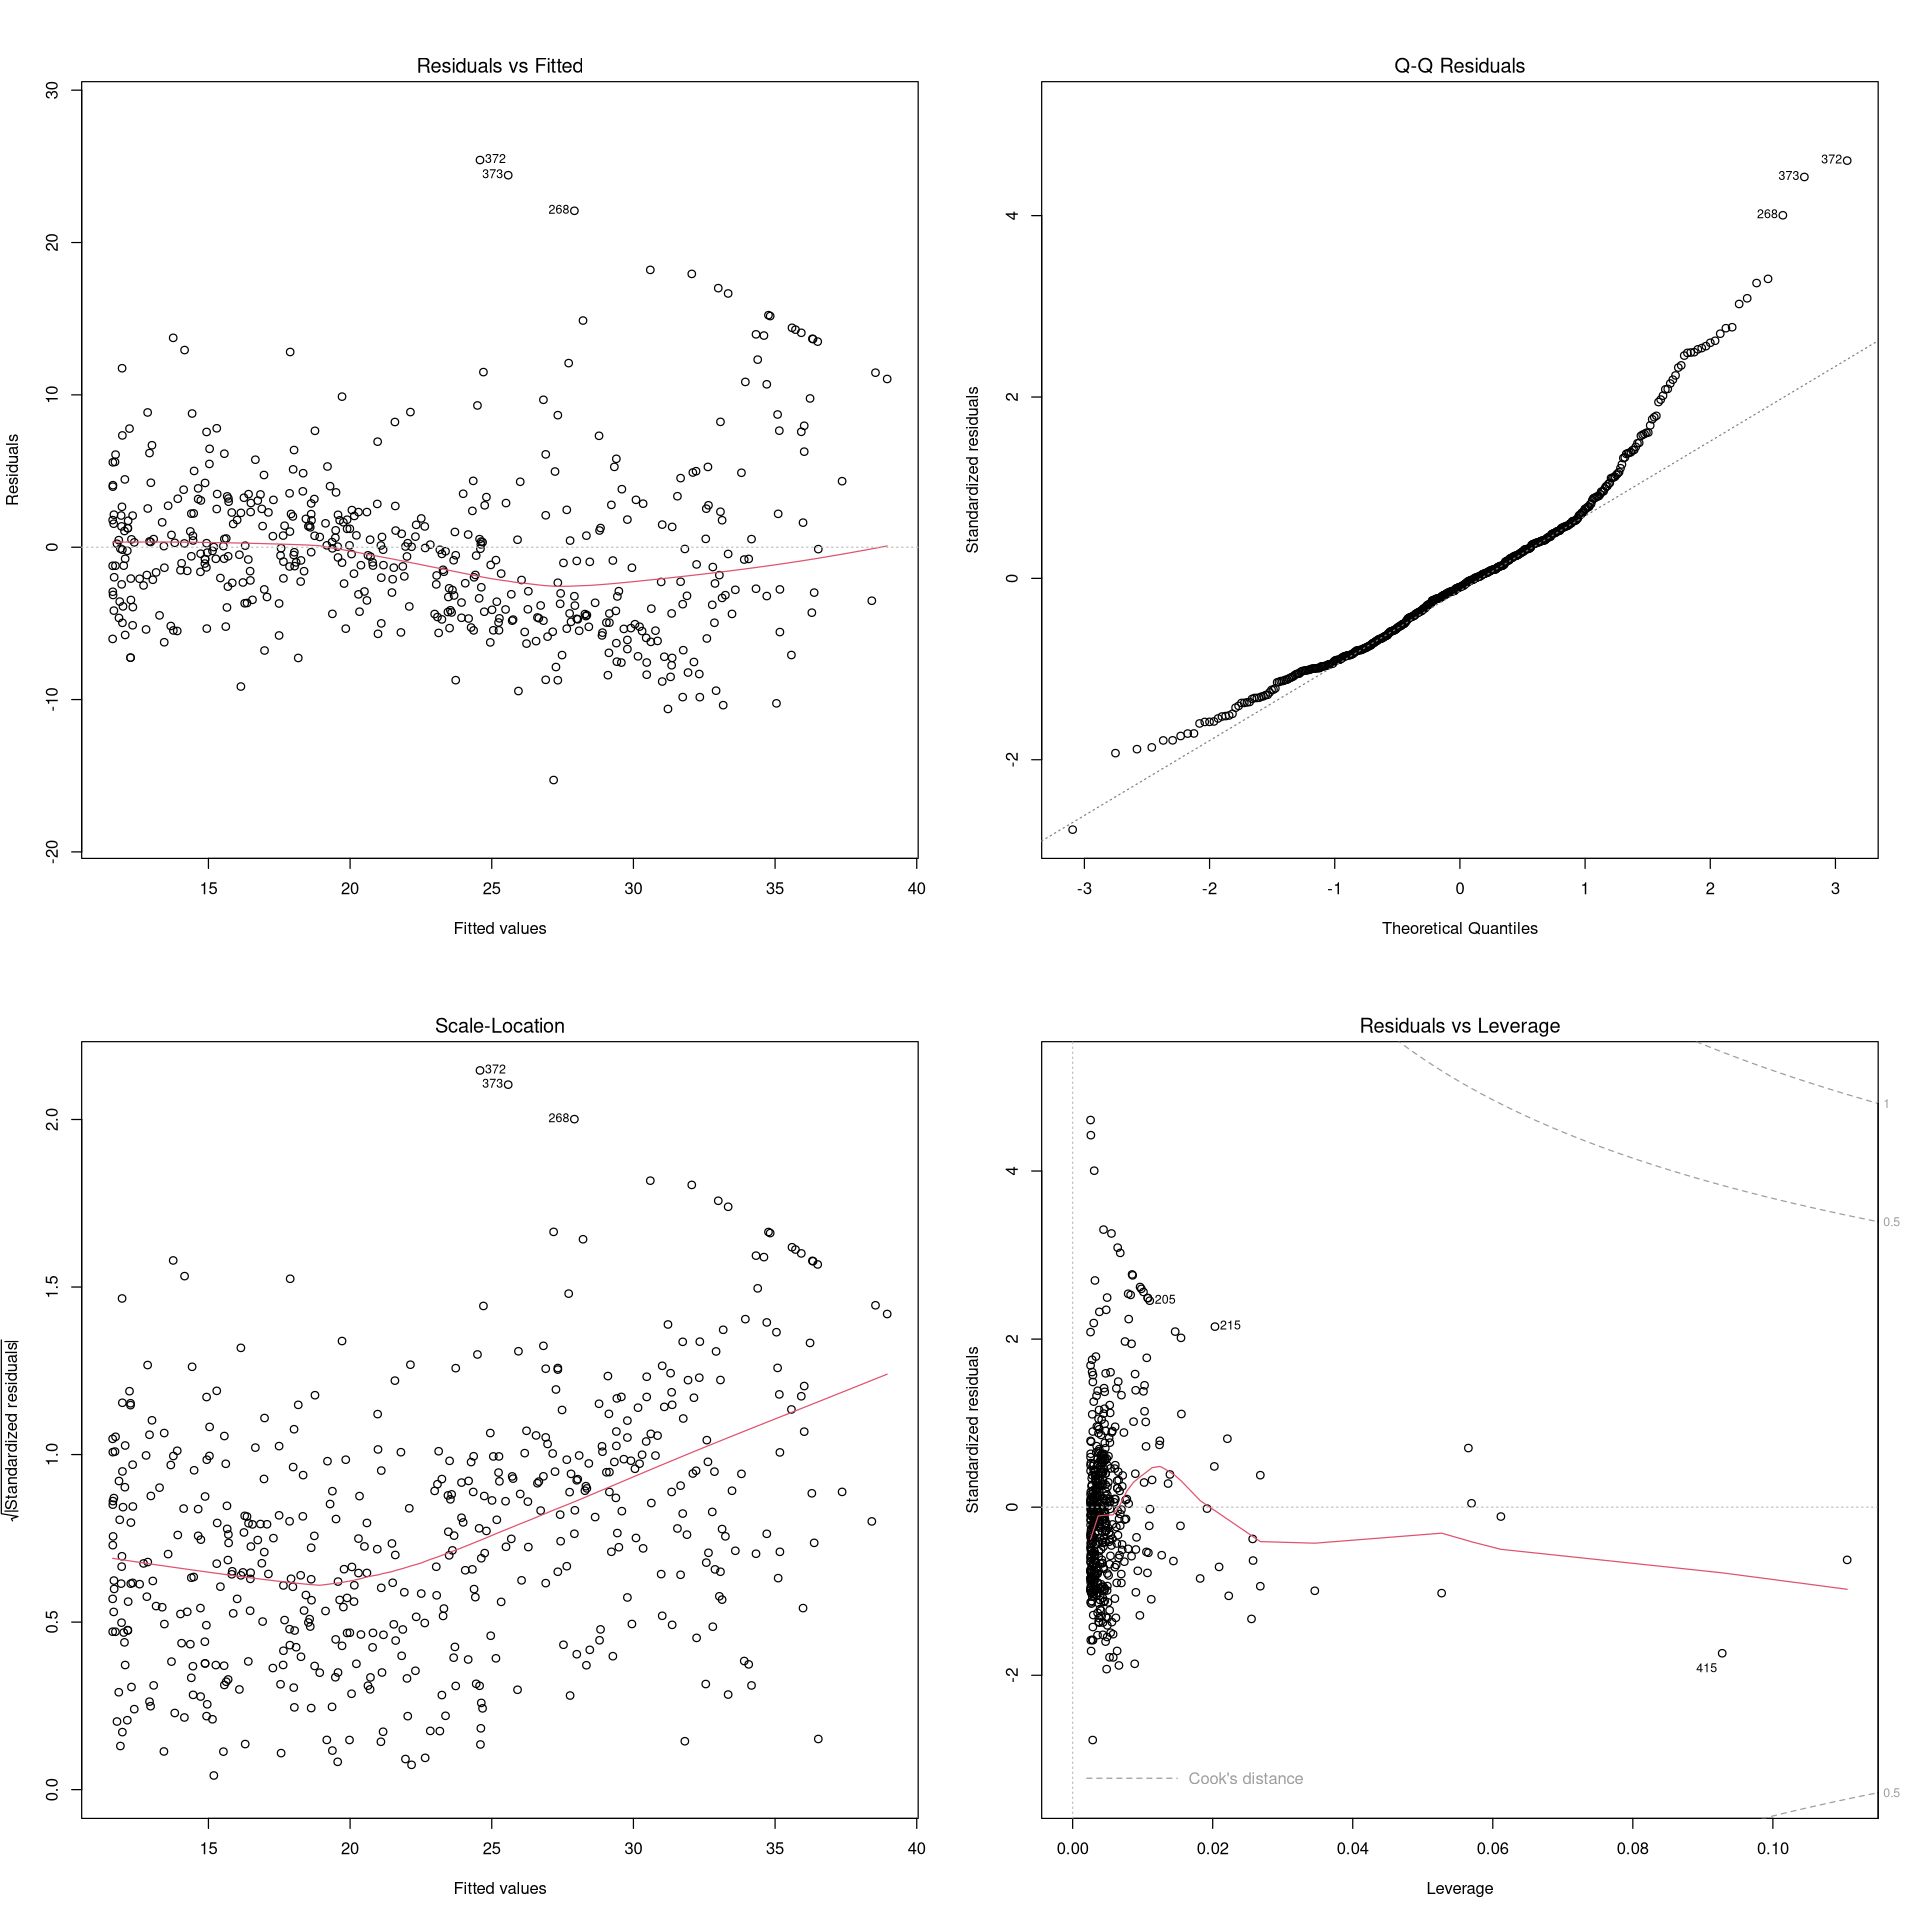

In [3]:
par(mfrow = c(2, 2))
options(repr.plot.width=16, repr.plot.height=16)
plot(lm.fit2)

then we see that when the `lstat`$^2$ term is included in the model, there is little discernible pattern in the residuals.

In order to create a cubic fit, we can include a predictor of the form `I(X^3)`. However, this approach can start to get cumbersome for higher-order polynomials. A better approach involves using the `poly()` function to create the polynomial within `lm()`. For example, the following command produces a fifth-order polynomial fit:

In [4]:
lm.fit5 <- lm(medv ~ poly(lstat, 5))
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


This suggests that including additional polynimial terms, up to fifth order, leads to an improvement in the model fit! However, further investigation of the data reveals that no polynomial terms beyond fifth order have significant _p_-values in a regression fit.

By default, the `poly()` function orthogonalizes the predictors: this means that the features output by this function are not simply a sequence of powers of the argument. However, a linear model applied to the output of the `poly()` function will have the same fitted values as a linear model applied to the raw polynomials (although the coefficient estimates, standard errors, and _p_-values will differ). In order to obtain the raw polynomials from the `poly()` function, the argument `raw = TRUE` must be used.

Of course, we are in no way restricted to using polynomial transformations of the predictors. Here we try a log transformation.

In [5]:
summary(lm(medv ~ log(rm), data = Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16
